 By the use of several Machine learning models, we will predict the quality of the wine.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


Now let’s look at the first five rows of the dataset.

In [3]:
df = pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Let’s explore the type of data present in each of the columns present in the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Now we’ll explore the descriptive statistical measures of the dataset.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Let’s draw the histogram to visualise the distribution of the data with continuous values in the columns of the dataset.

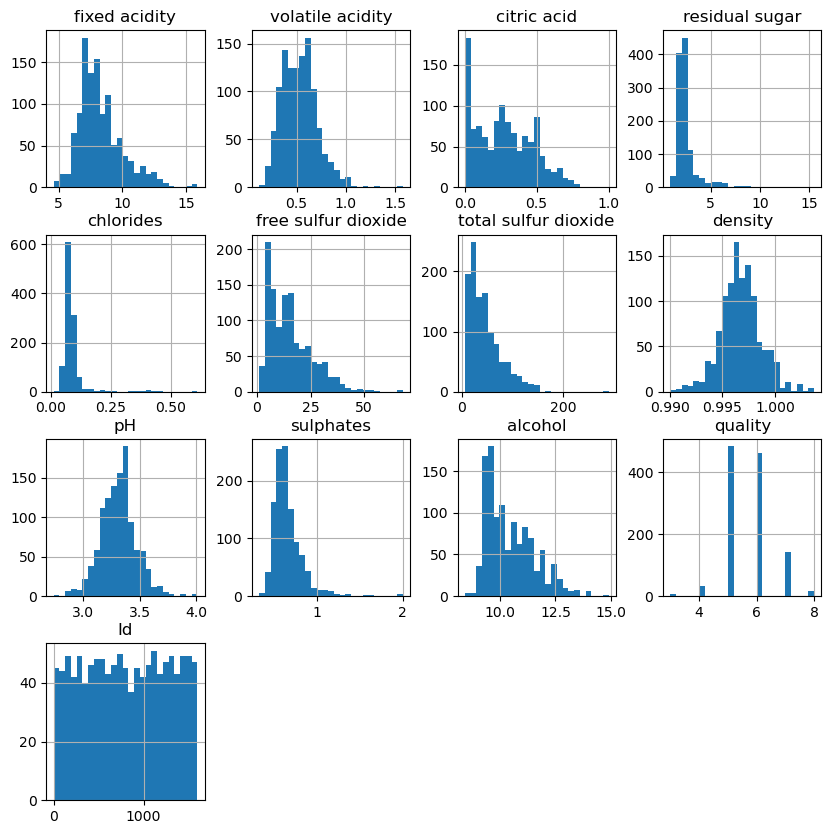

In [7]:
df.hist(bins=25, figsize=(10, 10))
plt.show()


Now let’s draw the count plot to visualise the number data for each quality of wine.

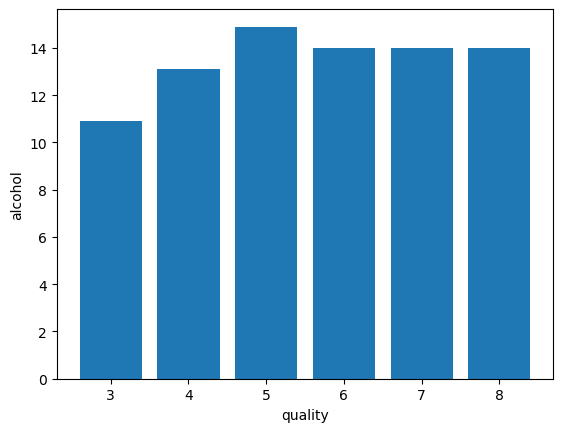

In [8]:
plt.bar(df["quality"], df["alcohol"])
plt.xlabel("quality")
plt.ylabel("alcohol")
plt.show()

There are times the data provided to us contains redundant features they do not help with increasing the model’s performance that is why we remove them before using them to train our model.

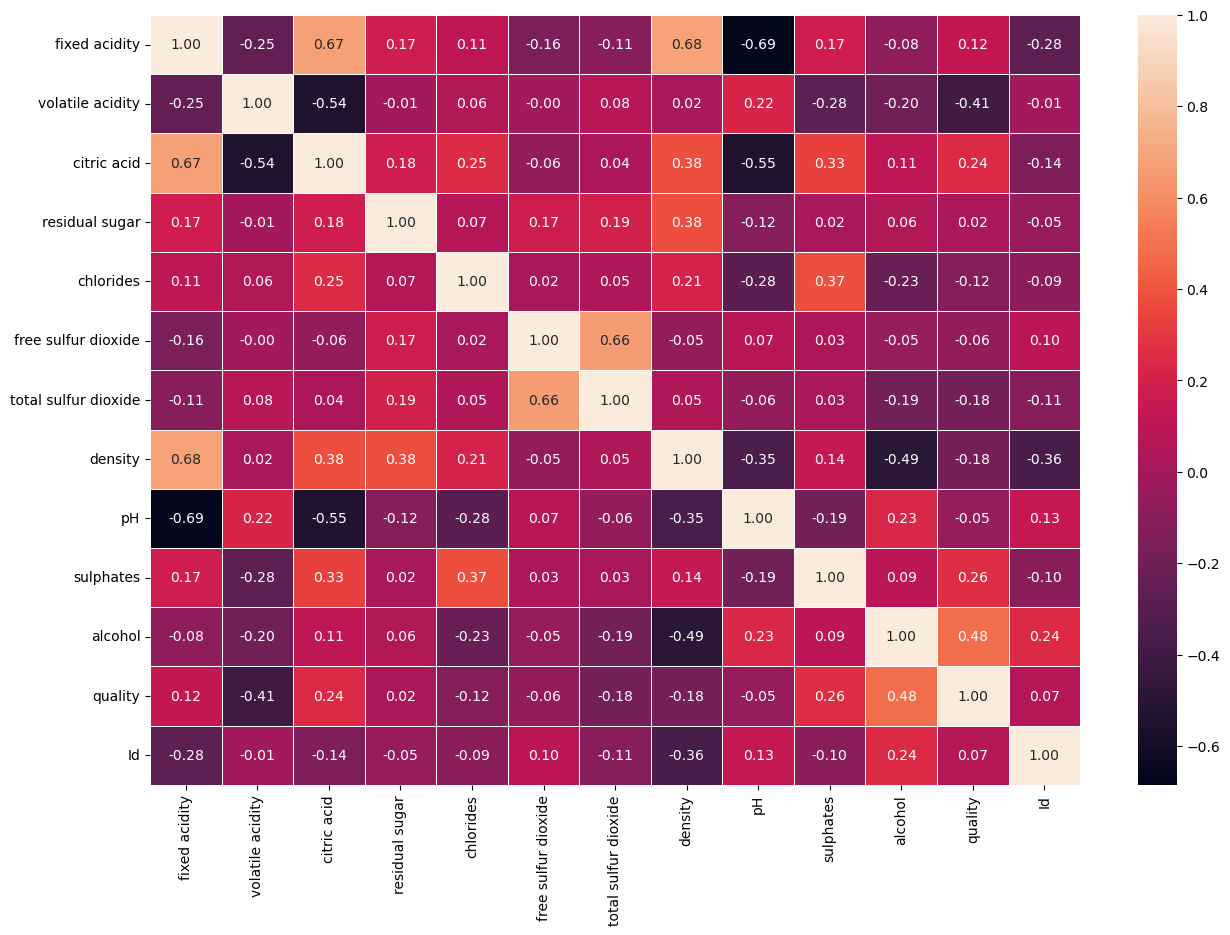

In [4]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f");

# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

From the above we remove the unwanted features

In [5]:
col = ["alcohol","sulphates","density","total sulfur dioxide","chlorides","citric acid","volatile acidity","fixed acidity","quality"]

In [6]:
for i in df.columns:
    if i in col:
        pass
    else:
        df.drop(i,axis = "columns", inplace = True)

In [11]:
df["quality"].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

Here we see the distribution of Quality of Wine

<Axes: >

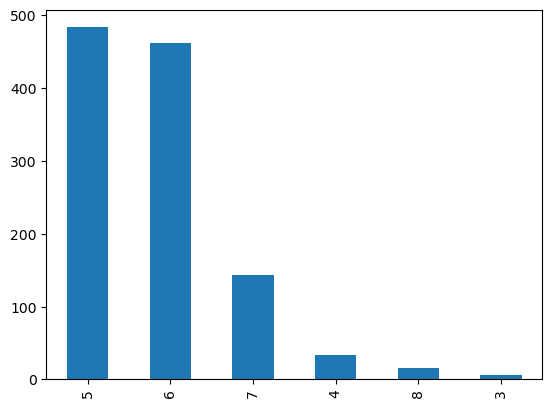

In [9]:
df["quality"].value_counts().plot(kind = "bar")

In [10]:
df5_count , df6_count,df7_count, df4_count, df8_count, df3_count = df.quality.value_counts() 

In [11]:
df5_count

483

OVERSAMPLING

In [12]:
df5_over = df[df["quality"] == 5]
df6_over = df[df["quality"]== 6]
df8_over = df[df["quality"]== 8]
df7_over = df[df["quality"]== 7]
df3_over = df[df["quality"]== 3]
df4_over = df[df["quality"]== 4]

In [13]:
df6_over

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,6
13,7.9,0.320,0.51,0.341,56.0,0.99690,1.08,9.2,6
17,6.9,0.400,0.14,0.085,40.0,0.99680,0.63,9.7,6
21,7.8,0.645,0.00,0.082,16.0,0.99640,0.59,9.8,6
25,7.8,0.645,0.00,0.086,18.0,0.99860,0.55,9.6,6
...,...,...,...,...,...,...,...,...,...
1136,6.3,0.550,0.15,0.077,35.0,0.99314,0.82,11.6,6
1137,5.4,0.740,0.09,0.089,26.0,0.99402,0.56,11.6,6
1138,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0,6
1139,6.8,0.620,0.08,0.068,38.0,0.99651,0.82,9.5,6


In [14]:
df4 = df4_over.sample(df5_count , replace = True)
df4

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
1040,6.2,0.785,0.00,0.060,13.0,0.99664,0.61,10.0,4
832,6.5,0.880,0.03,0.079,47.0,0.99572,0.50,11.2,4
839,8.8,0.955,0.05,0.075,19.0,0.99616,0.44,9.6,4
189,8.1,0.870,0.00,0.096,61.0,1.00025,0.72,9.8,4
411,9.9,0.500,0.24,0.103,14.0,0.99780,0.52,10.0,4
...,...,...,...,...,...,...,...,...,...
1040,6.2,0.785,0.00,0.060,13.0,0.99664,0.61,10.0,4
185,7.0,0.975,0.04,0.087,67.0,0.99565,0.60,9.4,4
904,8.5,0.400,0.40,0.050,10.0,0.99566,0.56,12.0,4
449,10.1,0.935,0.22,0.105,86.0,1.00100,0.64,11.3,4


In [15]:
df7 = df7_over.sample(df5_count , replace = True)
df8 = df8_over.sample(df5_count , replace = True)
df6 = df6_over.sample(df5_count , replace = True)
df3 = df3_over.sample(df5_count , replace = True)

In [16]:
dfnew = pd.concat([df3,df4,df6,df7,df8,df5_over], axis =0)

In [17]:
dfnew

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
922,7.6,1.580,0.00,0.137,9.0,0.99476,0.40,10.90,3
1055,7.1,0.875,0.05,0.082,14.0,0.99808,0.52,10.20,3
1055,7.1,0.875,0.05,0.082,14.0,0.99808,0.52,10.20,3
1055,7.1,0.875,0.05,0.082,14.0,0.99808,0.52,10.20,3
1074,6.7,0.760,0.02,0.078,12.0,0.99600,0.63,9.95,3
...,...,...,...,...,...,...,...,...,...
1124,7.3,0.690,0.32,0.069,104.0,0.99632,0.51,9.50,5
1131,6.1,0.715,0.10,0.053,27.0,0.99362,0.50,11.90,5
1132,6.2,0.460,0.29,0.074,98.0,0.99578,0.62,9.80,5
1140,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.50,5


In [18]:
483 * 6

2898

In [19]:
quality4 = dfnew[dfnew["quality"] == 4]

In [20]:
len(quality4)

483

In [21]:
quality5 = dfnew[dfnew["quality"] == 5]

In [22]:
len(quality5)

483

In [23]:
quality7 = dfnew[dfnew["quality"] == 7]

In [24]:
quality8 = dfnew[dfnew["quality"] == 8]

In [25]:
quality6 = dfnew[dfnew["quality"] == 6]

In [26]:
quality3 = dfnew[dfnew["quality"] == 3]

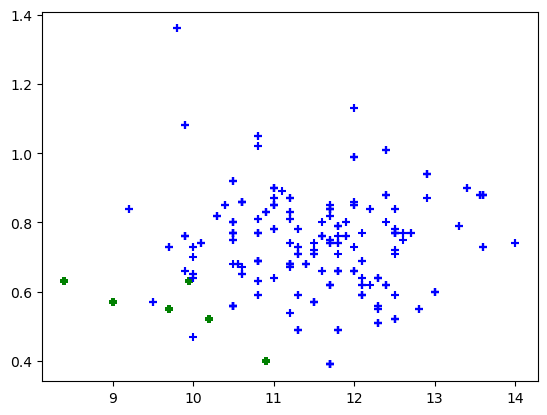

In [27]:
plt.scatter(quality3["alcohol"],quality3["sulphates"],marker = "+",color = "g")
plt.scatter(quality7["alcohol"],quality7["sulphates"],marker = "+",color = "b")

(array([ 3.,  3.,  0.,  7., 13., 13.,  5.,  4., 54.,  0., 39., 26., 30.,
        27., 14., 52., 33., 24., 21., 21., 43.,  6.,  4., 14.,  0.,  3.,
         4., 18.,  0.,  2.]),
 array([ 9.2 ,  9.36,  9.52,  9.68,  9.84, 10.  , 10.16, 10.32, 10.48,
        10.64, 10.8 , 10.96, 11.12, 11.28, 11.44, 11.6 , 11.76, 11.92,
        12.08, 12.24, 12.4 , 12.56, 12.72, 12.88, 13.04, 13.2 , 13.36,
        13.52, 13.68, 13.84, 14.  ]),
 <BarContainer object of 30 artists>)

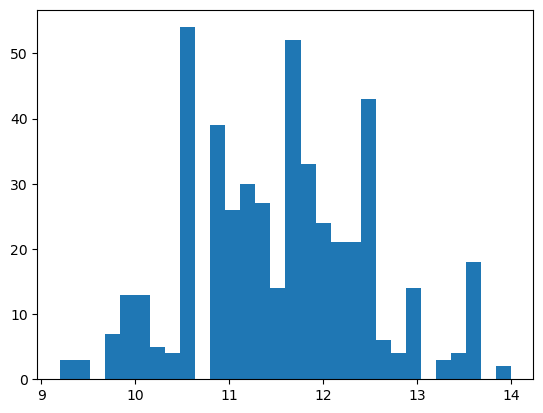

In [28]:
plt.hist(quality7["alcohol"],bins = 30)

In [29]:
dfnew = dfnew[dfnew["alcohol"] <= 13]

(array([ 81.,   0.,   2., 118.,  49., 150.,  94., 191., 134., 152., 181.,
        181.,  35., 121.,  33.,  73., 304.,  16., 156.,  95.,  50., 120.,
        104.,  49.,  24.,  23.,  89.,  30.,  53.,  49.]),
 array([ 8.4       ,  8.55333333,  8.70666667,  8.86      ,  9.01333333,
         9.16666667,  9.32      ,  9.47333333,  9.62666667,  9.78      ,
         9.93333333, 10.08666667, 10.24      , 10.39333333, 10.54666667,
        10.7       , 10.85333333, 11.00666667, 11.16      , 11.31333333,
        11.46666667, 11.62      , 11.77333333, 11.92666667, 12.08      ,
        12.23333333, 12.38666667, 12.54      , 12.69333333, 12.84666667,
        13.        ]),
 <BarContainer object of 30 artists>)

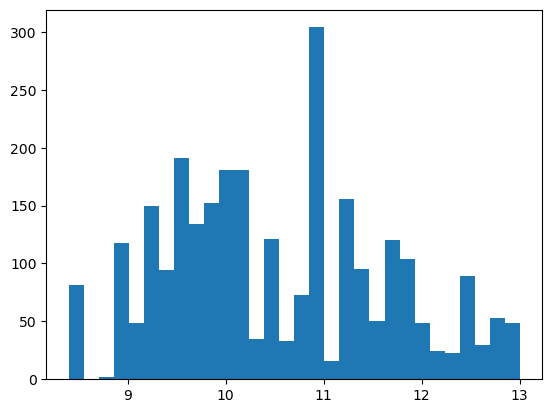

In [30]:
plt.hist(dfnew["alcohol"],bins = 30)

(array([  5.,  19.,  77., 228., 318., 268., 169., 133., 139., 277., 241.,
        168.,  78., 119.,  43., 194.,  27., 105.,  47.,  21.,   0.,   1.,
          0.,   0.,   2.,   0.,   0.,   0.,   0.,  78.]),
 array([0.12      , 0.16866667, 0.21733333, 0.266     , 0.31466667,
        0.36333333, 0.412     , 0.46066667, 0.50933333, 0.558     ,
        0.60666667, 0.65533333, 0.704     , 0.75266667, 0.80133333,
        0.85      , 0.89866667, 0.94733333, 0.996     , 1.04466667,
        1.09333333, 1.142     , 1.19066667, 1.23933333, 1.288     ,
        1.33666667, 1.38533333, 1.434     , 1.48266667, 1.53133333,
        1.58      ]),
 <BarContainer object of 30 artists>)

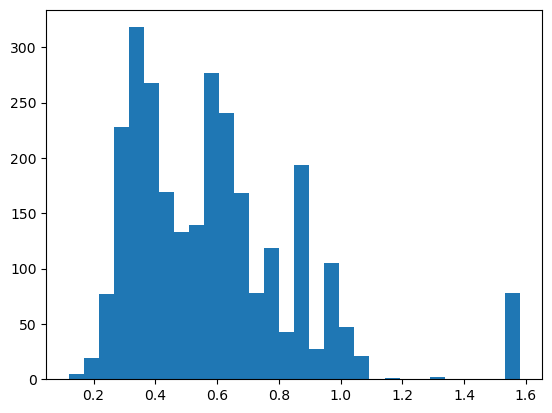

In [31]:
plt.hist(dfnew["volatile acidity"],bins = 30)

In [32]:
dfnew = dfnew[dfnew["volatile acidity"] <= 1.1]

In [33]:
dfnew = dfnew[dfnew["chlorides"] <= 0.15 ]

(array([ 10.,   0.,   0.,   0.,   0.,   3.,  14.,  57.,  44.,  72., 242.,
         99., 294., 369., 334., 385., 178.,  82., 108.,  36.,  84.,  31.,
         19.,  21.,  33.,   5.,   2.,   1.,   0.,  18.]),
 array([0.012 , 0.0165, 0.021 , 0.0255, 0.03  , 0.0345, 0.039 , 0.0435,
        0.048 , 0.0525, 0.057 , 0.0615, 0.066 , 0.0705, 0.075 , 0.0795,
        0.084 , 0.0885, 0.093 , 0.0975, 0.102 , 0.1065, 0.111 , 0.1155,
        0.12  , 0.1245, 0.129 , 0.1335, 0.138 , 0.1425, 0.147 ]),
 <BarContainer object of 30 artists>)

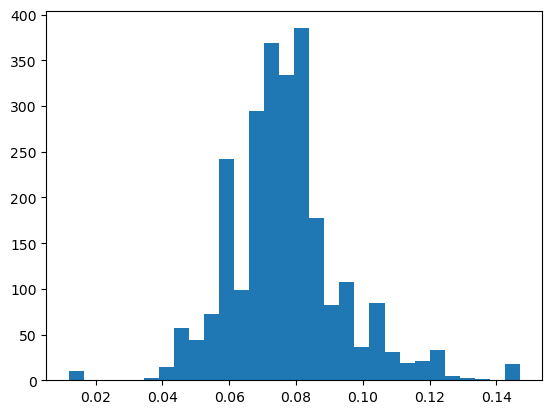

In [34]:
plt.hist(dfnew["chlorides"],bins = 30)

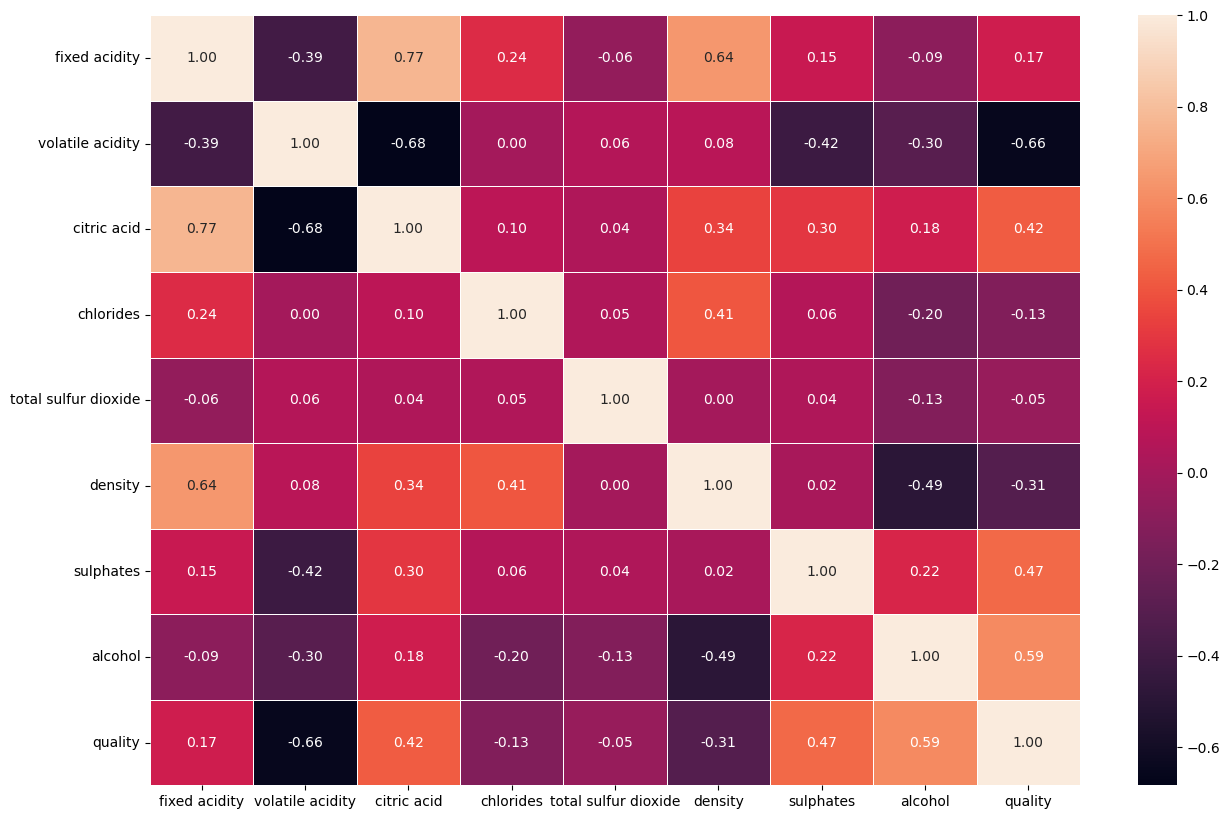

In [35]:
corr_matrix = dfnew.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f");

In [36]:
x = dfnew.drop("quality",axis =1)
y = dfnew["quality"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [37]:
from sklearn.preprocessing import MinMaxScaler
traindf = MinMaxScaler()
x_train_scaled = traindf.fit_transform(x_train)
x_test_scaled = traindf.transform(x_test)
x_train = pd.DataFrame(x_train_scaled)
x_test = pd.DataFrame(x_test_scaled)

In [38]:
x_train

,0,1,2,3,4,5,6,7
0,0.150943,0.742268,0.037975,0.348148,0.145390,0.390708,0.141975,0.847826
1,0.254717,0.474227,0.012658,0.562963,0.039007,0.427266,0.141975,0.456522
2,0.320755,0.943299,0.189873,0.451852,0.166667,0.680122,0.098765,0.326087
3,0.415094,0.582474,0.139241,0.481481,0.085106,0.634425,0.228395,0.369565
4,0.245283,0.613402,0.000000,0.414815,0.099291,0.400609,0.197531,0.652174
...,...,...,...,...,...,...,...,...
2027,0.150943,0.742268,0.037975,0.348148,0.145390,0.390708,0.141975,0.847826
2028,0.018868,0.541237,0.000000,0.503704,0.074468,0.332826,0.172840,0.891304
2029,0.150943,0.623711,0.113924,0.777778,0.035461,0.493526,0.098765,0.521739
2030,0.169811,0.484536,0.075949,0.355556,0.039007,0.466870,0.160494,0.521739


In [39]:
from sklearn.svm import SVC

In [40]:
model = SVC(random_state = 42 , C = 15 ,kernel = "rbf",gamma = "scale")
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.8231827111984283

In [41]:
y_preds = model.predict(x_test)

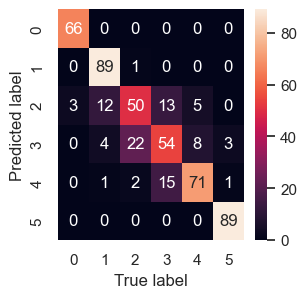

In [42]:
sns.set(font_scale=1.0)

def plot_conf_mat(y_test, y_preds):

    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     fmt="d")
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,y_preds)

In [58]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state = 42,n_estimators = 150)
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.9214145383104125

In [44]:
y_preds2 = model2.predict(x_test)

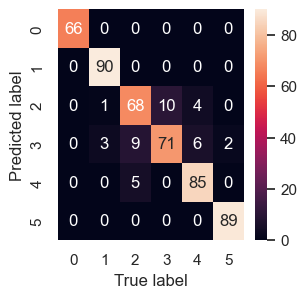

In [45]:
sns.set(font_scale=1.0)

def plot_conf_mat(y_test, y_preds):

    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     fmt="d")
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,y_preds2)

In [46]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [47]:
# Assuming you have a dataset 'X' (features) and 'y' (labels)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [48]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)



In [49]:
unique_classes_train = set(y_train)
unique_classes_test = set(y_test)

print("Unique Classes in Training Set:", unique_classes_train)
print("Unique Classes in Test Set:", unique_classes_test)


Unique Classes in Training Set: {0, 1, 2, 3, 4, 5}
Unique Classes in Test Set: {0, 1, 2, 3, 4, 5}


In [50]:
model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [51]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.9096267190569745


In [52]:
# Example of tuning max depth and learning rate
tuned_model = xgb.XGBClassifier(objective="binary:logistic", max_depth=5, learning_rate=0.1, n_estimators=100, random_state=42)
tuned_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [53]:
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)


Feature Importance: [0.10941627 0.19642572 0.09792982 0.09724576 0.09673934 0.08623641
 0.10401417 0.21199253]
